In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') # this file is in files_for_lesson_and_activities folder
data#.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.shape

(9134, 24)

In [4]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
Customer,0.0
State,0.0
Vehicle Class,0.0
Total Claim Amount,0.0
Sales Channel,0.0
Renew Offer Type,0.0
Policy,0.0
Policy Type,0.0
Number of Policies,0.0
Number of Open Complaints,0.0


In [6]:
data.corr()['Monthly Premium Auto'].sort_values(ascending=False)

Monthly Premium Auto             1.000000
Total Claim Amount               0.632017
Customer Lifetime Value          0.396262
Months Since Policy Inception    0.020257
Months Since Last Claim          0.005026
Number of Policies              -0.011233
Number of Open Complaints       -0.013122
Income                          -0.016665
Name: Monthly Premium Auto, dtype: float64

In [7]:
data.corr()['Monthly Premium Auto'][[ 'Customer Lifetime Value', 'Total Claim Amount']]

Customer Lifetime Value    0.396262
Total Claim Amount         0.632017
Name: Monthly Premium Auto, dtype: float64

In [8]:
data['Monthly Premium Auto'].value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: Monthly Premium Auto, Length: 202, dtype: int64

In [9]:
data['Total Claim Amount'].value_counts()

data['Total Claim Amount'] = data['Total Claim Amount'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['Total Claim Amount'].value_counts()

O    9134
Name: Total Claim Amount, dtype: int64

In [10]:
data['Monthly Premium Auto'] = data['Monthly Premium Auto'].fillna(data['Monthly Premium Auto'].median())

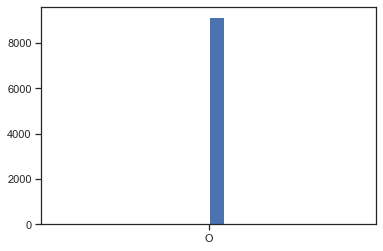

In [11]:
plt.hist(data['Total Claim Amount'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

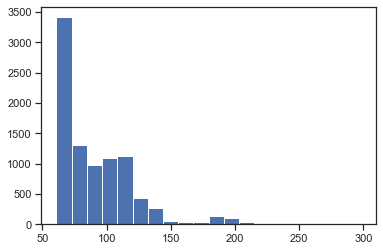

In [12]:
plt.hist(data['Monthly Premium Auto'].fillna(data['Monthly Premium Auto'].mean()), bins=20)
plt.show()

In [13]:
data['Monthly Premium Auto'] = data['Monthly Premium Auto'].interpolate(method='polynomial', order=2)

In [14]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [15]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


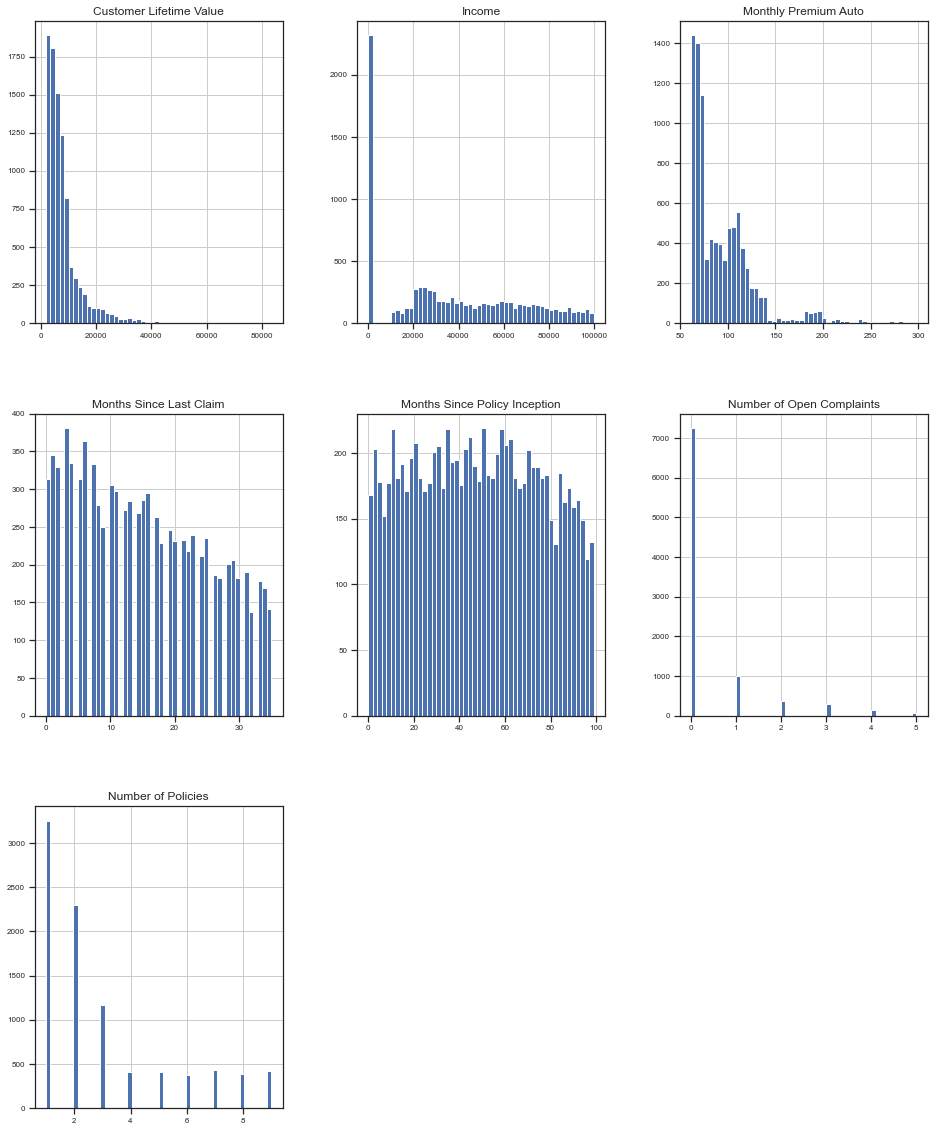

In [16]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

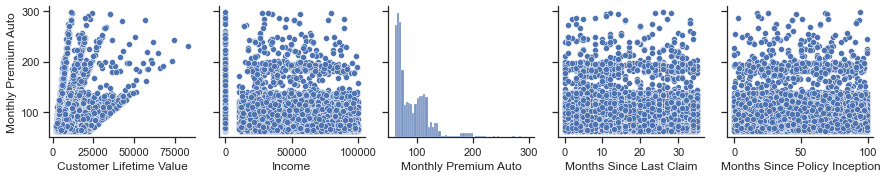

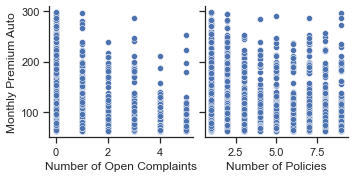

In [17]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['Monthly Premium Auto'])

In [18]:
# shuffling the df but maintaining a column with the original indexes
data1 = data.copy().sample(frac=1).reset_index().rename(columns={'index': 'ind'})
data1

,ind,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,6489,WU50951,Washington,6846.150323,Yes,Extended,Bachelor,1/27/11,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Personal Auto,Personal L2,Offer1,Call Center,O,Two-Door Car,Large
1,8557,BZ92811,California,5948.988960,No,Premium,High School or Below,2/20/11,Employed,F,88122,Suburban,Married,148,15,10,0,1,Corporate Auto,Corporate L2,Offer2,Call Center,O,SUV,Medsize
2,1373,SI11249,California,5048.226244,No,Basic,High School or Below,2/11/11,Employed,F,29401,Suburban,Single,65,30,56,0,4,Personal Auto,Personal L3,Offer1,Branch,O,Four-Door Car,Small
3,9053,SF30642,California,8996.774075,No,Basic,High School or Below,2/13/11,Employed,M,49706,Suburban,Married,113,13,95,0,3,Personal Auto,Personal L3,Offer2,Call Center,O,SUV,Medsize
4,8843,RM93459,California,17497.522010,Yes,Basic,College,2/28/11,Unemployed,M,0,Suburban,Divorced,73,9,94,0,2,Personal Auto,Personal L3,Offer1,Agent,O,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,7084,UO40726,Oregon,3146.037899,No,Extended,Bachelor,2/21/11,Employed,F,28089,Suburban,Single,82,11,72,1,1,Personal Auto,Personal L2,Offer4,Agent,O,Two-Door Car,Medsize
9130,4905,EB72052,Oregon,12105.294220,No,Basic,College,2/6/11,Employed,M,33345,Suburban,Divorced,102,34,37,0,2,Personal Auto,Personal L3,Offer2,Call Center,O,SUV,Medsize
9131,5863,EM16179,Arizona,8274.145703,No,Basic,College,1/6/11,Employed,F,69011,Suburban,Single,70,3,52,0,2,Personal Auto,Personal L3,Offer1,Call Center,O,Four-Door Car,Medsize
9132,6665,OG69038,Washington,6220.765007,No,Basic,High School or Below,2/5/11,Unemployed,F,0,Suburban,Single,65,5,63,2,2,Corporate Auto,Corporate L2,Offer1,Agent,O,Four-Door Car,Large


In [19]:
# applying interpolation to shuffled df
data1['Monthly Premium Auto'] = data1['Monthly Premium Auto'].interpolate(method='polynomial', order=2)

<AxesSubplot:>

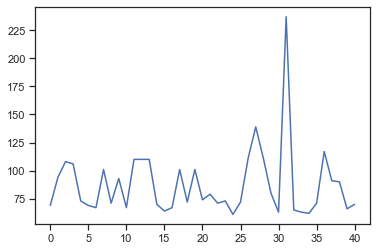

In [20]:
data['Monthly Premium Auto'].loc[0:40].plot()

<AxesSubplot:>

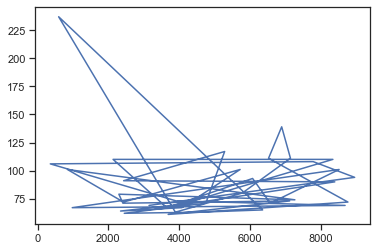

In [21]:
data1.sort_values('ind')['Monthly Premium Auto'][0:40].plot()

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Monthly Premium Auto', axis=1)
y = data['Monthly Premium Auto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [23]:
from sklearn.preprocessing import StandardScaler
import pickle

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)

# if you need to un-scale afterwards, speacially if you scaled target variable:
unscaled_X_train = loaded_transformer.inverse_transform(X_train_)

# it makes sense to scale the target variable as well
unscaled_X_train[0][0]

4768.955924

In [24]:
from sklearn.preprocessing import Normalizer

numericals = X.select_dtypes(np.number) # using only X, and not y

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

In [25]:
from sklearn.preprocessing import MinMaxScaler

numericals = data.select_dtypes(np.number)

transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [26]:
#Categorical data

for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

No     7826
Yes    1308
Name: Response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157


In [27]:
categories = pd.DataFrame(data['Monthly Premium Auto'].value_counts())
categories.columns = ['counts']
categories

,counts
65,348
66,307
71,304
73,302
63,289
...,...
273,1
287,1
268,1
232,1


In [28]:
categories = pd.DataFrame(data['Gender'].value_counts())
categories.columns = ['counts']
categories

,counts
F,4658
M,4476


In [29]:
categories = pd.DataFrame(data['EmploymentStatus'].value_counts())
categories.columns = ['counts']
categories

,counts
Employed,5698
Unemployed,2317
Medical Leave,432
Disabled,405
Retired,282


In [30]:
categories = pd.DataFrame(data['Education'].value_counts())
categories.columns = ['counts']
categories

,counts
Bachelor,2748
College,2681
High School or Below,2622
Master,741
Doctor,342


In [31]:
categories = pd.DataFrame(data['State'].value_counts())
categories.columns = ['counts']
categories

,counts
California,3150
Oregon,2601
Arizona,1703
Nevada,882
Washington,798


In [32]:
group_states = categories[categories['counts'] < 2000].index
group_states

Index(['Arizona', 'Nevada', 'Washington'], dtype='object')

In [33]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [34]:
data['State'] = data['State'].apply(clean_state)

In [35]:
data['State'].value_counts()

other         3383
California    3150
Oregon        2601
Name: State, dtype: int64

In [36]:
data['State'] = data['State'].apply(lambda x: x[0]+x[2])
data['State'].value_counts()

oh    3383
Cl    3150
Oe    2601
Name: State, dtype: int64

In [37]:
import re

In [38]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,oh,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,O,Two-Door Car,Medsize
1,QZ44356,oh,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,O,Four-Door Car,Medsize
2,AI49188,oh,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,O,Two-Door Car,Medsize
3,WW63253,Cl,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,O,SUV,Medsize
4,HB64268,oh,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,O,Four-Door Car,Medsize


In [39]:
data_crosstab = pd.crosstab(data['Gender'], data['Customer'], margins=True)
data_crosstab

Customer,AA10041,AA11235,AA16582,AA30683,AA34092,AA35519,AA56476,AA69265,AA71604,AA93585,AB13432,AB21519,AB23825,AB26022,AB31813,AB45325,AB60627,AB62982,AB69140,AB72731,AB73565,AB78984,AB96670,AB98823,AC13887,AC22873,AC24378,AC40767,AC42963,AC58002,AC67315,AC73173,AC75391,AC79024,AD12500,AD18174,AD28349,AD28535,AD33653,AD33971,AD38685,AD56037,AD63766,AD71478,AD89594,AD95939,AE23906,AE30506,AE60813,AE62631,AE74442,AE89300,AE90216,AE93522,AE98193,AF10970,AF17671,AF20716,AF36894,AF37776,AF41118,AF47139,AF48816,AF49027,AF49625,AF69537,AF81450,AG22225,AG32304,AG39150,AG45299,AG47947,AG56998,AG58599,AG62087,AG62140,AG85127,AG85615,AH17051,AH22694,AH39293,AH41065,AH41449,AH53588,AH55475,AH58807,AH65907,AH84063,AH89786,AH92481,AH97088,AH99727,AI11191,AI14767,AI16519,AI47152,AI49188,AI49712,AI58313,AI58500,AI61368,AI74959,AI85843,AJ32539,AJ58038,AJ69060,AJ69778,AJ89107,AJ89108,AK11669,AK11719,AK17025,AK44985,AK46006,AK54675,AK59340,AK61491,AK72422,AK90865,AL21967,AL27471,AL35726,AL43475,AL43715,AL46984,AL50693,AL78075,AL95338,AL96740,AM17304,AM26598,AM26717,AM28777,AM29546,AM30008,AM32820,AM34581,AM36670,AM52614,AM53473,AM57175,AM72411,AM79057,AM88377,AM89558,AM92343,AM94127,AM97901,AM99192,AN21193,AN32867,AN36757,AN47199,AN53225,AN57220,AN67558,AN79079,AN80983,AN97123,AO20938,AO40386,AO42003,AO46433,AO74776,AO77635,AO87348,AO98601,AP23850,AP27994,AP32891,AP34711,AP46166,AP47670,AP52126,AP52565,AP56340,AP59947,AP63665,AP65984,AP66226,AP67935,AP89323,AP90638,AP95078,AP98768,AQ11656,AQ25590,AQ30231,AQ34238,AQ46199,AQ51159,AQ51368,AQ52711,AQ70385,AQ70619,AQ91207,AQ94108,AR17553,AR25213,AR40217,AR47849,AR59416,AR61426,AR63478,AR69517,AR75105,AR83514,AR96516,AR99766,AS17174,AS18084,AS26192,AS48176,AS55478,AS55677,AS60178,AS62048,AS77287,AS78838,AS93181,AS97690,AS99827,AT13963,AT18041,AT24793,AT26484,AT29024,AT30076,AT31367,AT33529,AT36002,AT41276,AT49447,AT52647,AT55072,AT62618,AT72574,AT79008,AT84725,AT86990,AT89553,AT93647,AT98182,AU11344,AU13233,AU23837,AU45793,AU46443,AU46604,AU62013,AU71562,AU75025,AU77281,AU91447,AU94279,AU96286,AU98438,AV17528,AV25133,AV49798,AV72430,AV76907,AV93209,AV96010,AW17574,AW18068,AW27717,AW36627,AW48347,AW71157,AW73065,AW77988,AW84946,AW86033,AX10148,AX28231,AX36597,AX38728,AX39008,AX45422,AX56708,AX70794,AX71238,AX71707,AX86150,AX86552,AX99820,AY18433,AY19539,AY26056,AY29281,AY30324,AY35050,AY35539,AY40674,AY43037,AY52869,AY55759,AY59197,AY73718,AY84441,AY88788,AY98473,AY99324,AZ15952,AZ29426,AZ31562,AZ34845,AZ36763,AZ38648,AZ43057,AZ50087,AZ62651,AZ64856,AZ68072,AZ68184,AZ74055,AZ75509,AZ77669,AZ82578,AZ84403,AZ87715,AZ90068,AZ95587,BA17836,BA19651,BA26944,BA38428,BA40043,BA49679,BA51898,BA52133,BA56812,BA66627,BA75404,BA87048,BA87216,BA92673,BA97018,BB10681,BB11622,BB19609,BB21794,BB41401,BB48165,BB65725,BB82067,BC31913,BC34309,BC35753,BC43958,BC47264,BC48076,BC51708,BC52397,BC53363,BC53546,BC62782,BC64697,BC66536,BC66921,BC75105,BC77846,BC85847,BC86800,BC87161,BC87551,BC90645,BC97773,BD12981,BD13927,BD16530,BD35524,BD35676,BD36887,BD42101,BD53342,BD58297,BD66455,BD69478,BD70337,BD77090,BD84823,BD89564,BE10809,BE17305,BE25221,BE31382,BE33446,BE54454,BE55425,BE61743,BE62503,BE65350,BE69929,BE75190,BE78308,BE92692,BF45697,BF54215,BF55854,BF56053,BF69918,BF72793,BG15419,BG19572,BG30513,BG42047,BG44829,BG48083,BG51419,BG55927,BG60187,BG73480,BG74433,BG76355,BG80246,BG84194,BG85305,BG95711,BG96711,BH11344,BH23017,BH28530,BH35016,BH35482,BH36570,BH36973,BH43020,BH43379,BH52611,BH60627,BH61054,BH61137,BH68769,BH86846,BI17208,BI27443,BI33231,BI34286,BI34376,BI38192,BI46495,BI76326,BI81476,BJ13380,BJ18904,BJ22117,BJ26599,BJ53923,BJ58596,BJ65040,BJ82316,BK15048,BK21146,BK43823,BK47926,BK57087,BK59444,BK61065,BK73302,BK76107,BK76340,BK83393,BK85520,BL12371,BL13393,BL29046,BL29240,BL42392,BL44708,BL44722,BL54814,BL55947,BL66157,BL79888,BL89983,BL90769,BL93527,BL93659,BM15160,BM16805,BM21532,BM27144,BM28359,BM30720,BM31989,BM39234,BM45823,BM46418,BM53580,BM55732,BM66931,BM69081,BM69818,BM70908,BM71358,BM83544,BM92346

In [40]:
data_crosstab = pd.crosstab(data['Gender'], data['EmploymentStatus'], margins=True)
data_crosstab

EmploymentStatus,Disabled,Employed,Medical Leave,Retired,Unemployed,All
Gender,,,,,,
F,244,2937,214,128,1135,4658
M,161,2761,218,154,1182,4476
All,405,5698,432,282,2317,9134


In [41]:
data_crosstab = pd.crosstab(data['Customer'], data['State'], margins=True)
data_crosstab

State,Cl,Oe,oh,All
Customer,,,,
AA10041,1,0,0,1
AA11235,0,0,1,1
AA16582,0,0,1,1
AA30683,1,0,0,1
AA34092,1,0,0,1
...,...,...,...,...
ZZ83340,0,1,0,1
ZZ89380,0,1,0,1
ZZ91716,1,0,0,1


In [42]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer            9134 non-null   object
 1   State               9134 non-null   object
 2   Response            9134 non-null   object
 3   Coverage            9134 non-null   object
 4   Education           9134 non-null   object
 5   Effective To Date   9134 non-null   object
 6   EmploymentStatus    9134 non-null   object
 7   Gender              9134 non-null   object
 8   Location Code       9134 non-null   object
 9   Marital Status      9134 non-null   object
 10  Policy Type         9134 non-null   object
 11  Policy              9134 non-null   object
 12  Renew Offer Type    9134 non-null   object
 13  Sales Channel       9134 non-null   object
 14  Total Claim Amount  9134 non-null   object
 15  Vehicle Class       9134 non-null   object
 16  Vehicle Size        9134

Text(0.5, 0.98, 'Categorical Plotting')

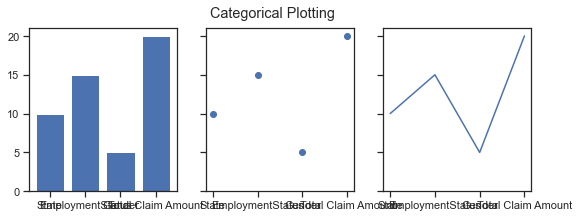

In [43]:
import matplotlib.pyplot as plt

data = {'State': 10, 'EmploymentStatus': 15, 'Gender': 5, 'Total Claim Amount': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Text(0.5, 0.98, 'Categorical Plotting')

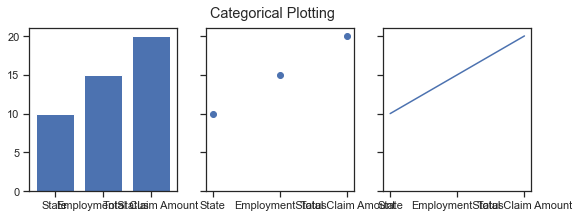

In [44]:

data = {'State': 10, 'EmploymentStatus': 15, 'Total Claim Amount': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Text(0.5, 0.98, 'Categorical Plotting')

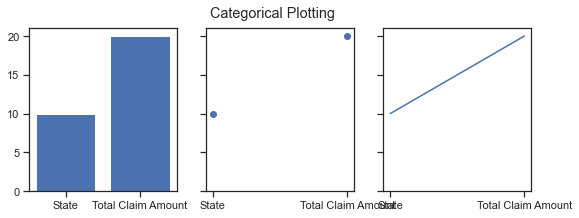

In [45]:
data = {'State': 10, 'Total Claim Amount': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Text(0.5, 0.98, 'Categorical Plotting')

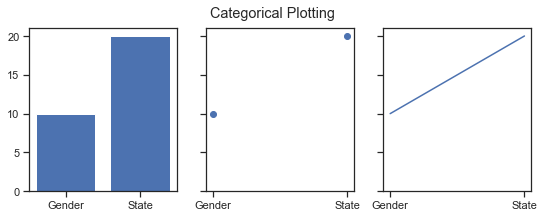

In [46]:
data = {'Gender': 10, 'State': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif_numericals = add_constant(numericals)
vif_numericals

,const,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,1.0,2763.519279,56274,69,32,5,0,1
1,1.0,6979.535903,0,94,13,42,0,8
2,1.0,12887.431650,48767,108,18,38,0,2
3,1.0,7645.861827,0,106,18,65,0,7
4,1.0,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,71941,73,18,89,0,2
9130,1.0,3096.511217,21604,79,14,28,0,1
9131,1.0,8163.890428,0,85,9,37,3,2
9132,1.0,7524.442436,21941,96,34,3,0,3


In [49]:
# To remove multicolinearity automatically:

threshold = 30

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]
        # drops that column
        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

,0
Number of Policies,1.001295
Number of Open Complaints,1.001420
Income,1.002301
Months Since Policy Inception,1.002441
Months Since Last Claim,1.002828
Monthly Premium Auto,1.188198
Customer Lifetime Value,1.190178


,const,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,1.0,2763.519279,56274,69,32,5,0,1
1,1.0,6979.535903,0,94,13,42,0,8
2,1.0,12887.431650,48767,108,18,38,0,2
3,1.0,7645.861827,0,106,18,65,0,7
4,1.0,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,71941,73,18,89,0,2
9130,1.0,3096.511217,21604,79,14,28,0,1
9131,1.0,8163.890428,0,85,9,37,3,2
9132,1.0,7524.442436,21941,96,34,3,0,3


In [50]:
vif = pd.DataFrame(index=vif_numericals.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numericals), i),2)
                     for i in range(len(vif_numericals.columns))]

In [51]:
vif.sort_values("VIF Factor")

,VIF Factor
Income,1.00
Months Since Last Claim,1.00
Months Since Policy Inception,1.00
Number of Open Complaints,1.00
Number of Policies,1.00
Customer Lifetime Value,1.19
Monthly Premium Auto,1.19
const,17.18


from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value


In [59]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value
# the result is a low p_value, so we can assume correlation between the variables

1.0

In [63]:
data = pd.get_dummies(data)